In [29]:
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import get_project_root


In [4]:
PROJECT_ROOT_PATH = get_project_root()
SCORES_DIR = os.path.join(PROJECT_ROOT_PATH,'reports/scores/')

In [5]:
PROJECT_ROOT_PATH

WindowsPath('d:/ml_python/programi/caffe_bar_sales_analysis/caffe_bar_sales_analysis')

In [10]:
scores_dict = {}
for filename in os.listdir(SCORES_DIR):
    if filename.endswith('.csv'):
        scores_dict[filename] = pd.read_csv(SCORES_DIR+filename)
        
        

In [57]:
for key, val in scores_dict.items():
    print(f"Features from {key}:\n{list(ast.literal_eval(val.features_coefs.values[0]).keys())}")
    print(f"Train wmape distribution:\n{val.train_wmape.describe()}")
    print(f"Val wmape distribution:\n{val.val_wmape.describe()}")

Features from 2021_06_06scores.csv:
['item_price', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'month_of_year_1', 'month_of_year_2', 'month_of_year_3', 'month_of_year_4', 'month_of_year_5', 'month_of_year_6', 'month_of_year_7', 'month_of_year_8', 'month_of_year_9', 'month_of_year_10', 'month_of_year_11', 'month_of_year_12', 'year', 'first_third_of_month', 'second_third_of_month', 'last_third_of_month', 'easter', 'easter_monday', 'christmas', 'new_years_day', 'new_years_eve']
Train wmape distribution:
count    35.000000
mean     54.598000
std      15.052693
min      22.750000
25%      47.940000
50%      52.540000
75%      60.210000
max      97.510000
Name: train_wmape, dtype: float64
Val wmape distribution:
count     35.000000
mean      59.954000
std       19.716281
min       24.880000
25%       49.925000
50%       59.980000
75%       71.295000
max      121.440000
Name: val_wmape, dtype: float64
Features from sca

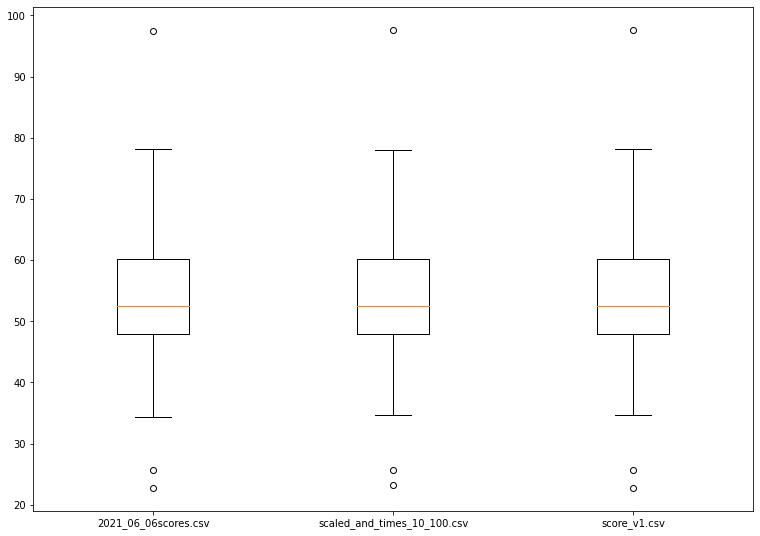

In [51]:
labels = list(scores_dict.keys())
train_data = [val.train_wmape.values for val in scores_dict.values()]
test_data = [val.val_wmape.values for val in scores_dict.values()]

fig = plt.figure(figsize =(10, 7)) 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(train_data)
ax.set_xticklabels(labels)
# show plot
plt.show()
